<a href="https://colab.research.google.com/github/PreranaKolambkar/Unified-Mentor-Internship/blob/main/Customer_Satisfcation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
#Load the dataset
data=pd.read_csv('/content/customer_support_tickets.csv')

**1.Data Understanding**

In [ ]:
#First Five Rows of the Dataset:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
data.shape

(8469, 17)

In [ ]:
#info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
#Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0


In [ ]:
#columns in the dataset
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [ ]:
#Numerical columns of the Dataset
numerical_columns=[i for i in data.columns if data[i].dtype!='O']
numerical_columns

['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']

In [ ]:
#Categorical columns of the Dataset
categorical_columns=[i for i in data.columns if data[i].dtype=='O']
categorical_columns

['Customer Name',
 'Customer Email',
 'Customer Gender',
 'Product Purchased',
 'Date of Purchase',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution']

In [ ]:
#Handling Missing values:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
#Impute the missing values
data['Resolution'].fillna(data['Resolution'].mode()[0],inplace=True)
data['First Response Time'].fillna(data['First Response Time'].mode()[0],inplace=True)
data['Time to Resolution'].fillna(data['Time to Resolution'].mode()[0],inplace=True)
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(),inplace=True)

<ipython-input-11-2a8f75c6affc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Resolution'].fillna(data['Resolution'].mode()[0],inplace=True)
<ipython-input-11-2a8f75c6affc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
#Recheck for the null values:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


**EDA(Exploratory Data Analysis)**

In [ ]:
#Analyze customer support ticket trends
#Identify Commom Issues
common_issues=data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
common_issues

Top 10 Common Issues:


,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547
Battery life,542
Network problem,539
Installation support,530
Product setup,529


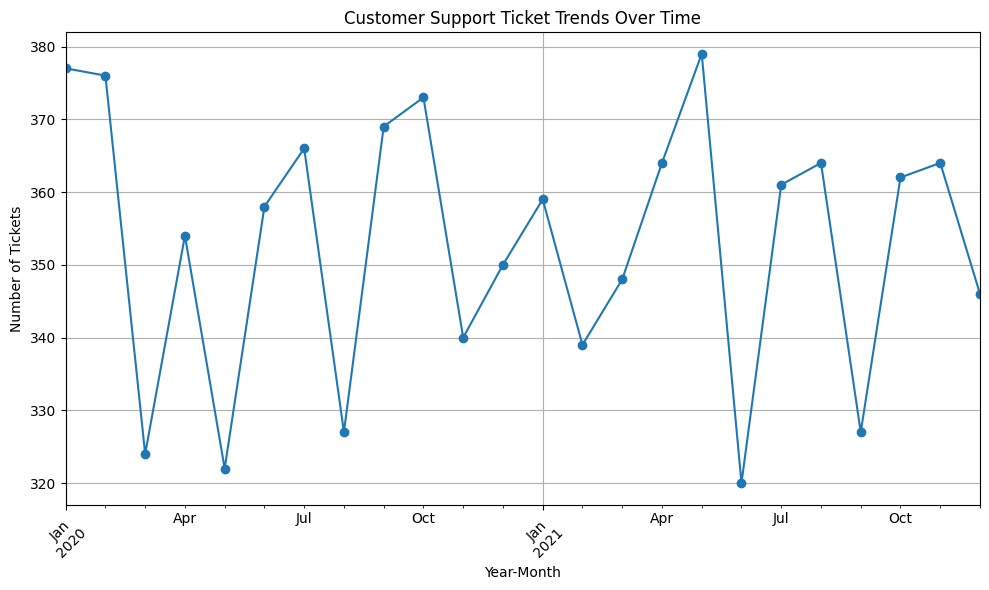

In [ ]:
#Plotting Ticket Trends over time:
data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
data['YearMonth']=data['Date of Purchase'].dt.to_period('M')
ticket_trends=data.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7a21d68c1ad0>,
 [Text(-1.0987212054253261, 0.053025585793259375, 'Refund request'),
  Text(-0.34712875720752656, -1.0437919457054448, 'Technical issue'),
  Text(0.898426406218868, -0.6346888943479709, 'Cancellation request'),
  Text(0.8936929106207744, 0.6413368705338629, 'Product inquiry'),
  Text(-0.28972307492988125, 1.0611599972921966, 'Billing inquiry')],
 [Text(-0.5993024756865415, 0.028923046796323293, '20.7%'),
  Text(-0.18934295847683263, -0.569341061293879, '20.6%'),
  Text(0.49005076702847344, -0.34619394237162043, '20.0%'),
  Text(0.48746886033860415, 0.34982011120028883, '19.4%'),
  Text(-0.15803076814357156, 0.5788145439775617, '19.3%')])

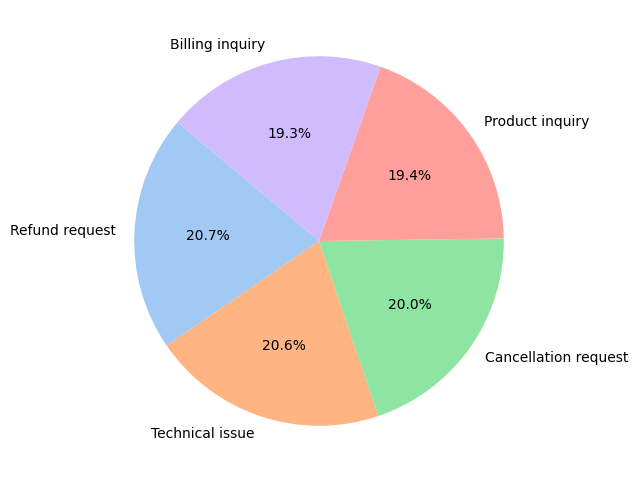

In [ ]:
#Segment based on ticket types
ticket_types=data['Ticket Type'].value_counts()
print(ticket_types)
plt.figure(figsize=(8, 6))
plt.pie(ticket_types, labels=ticket_types.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))

In [ ]:
#segment based on satisfaction levels:
satisfaction_counts=data['Customer Satisfaction Rating'].value_counts()
satisfaction_counts

,count
Customer Satisfaction Rating,
2.991333,5700
3.000000,580
1.000000,553
2.000000,549
5.000000,544
4.000000,543


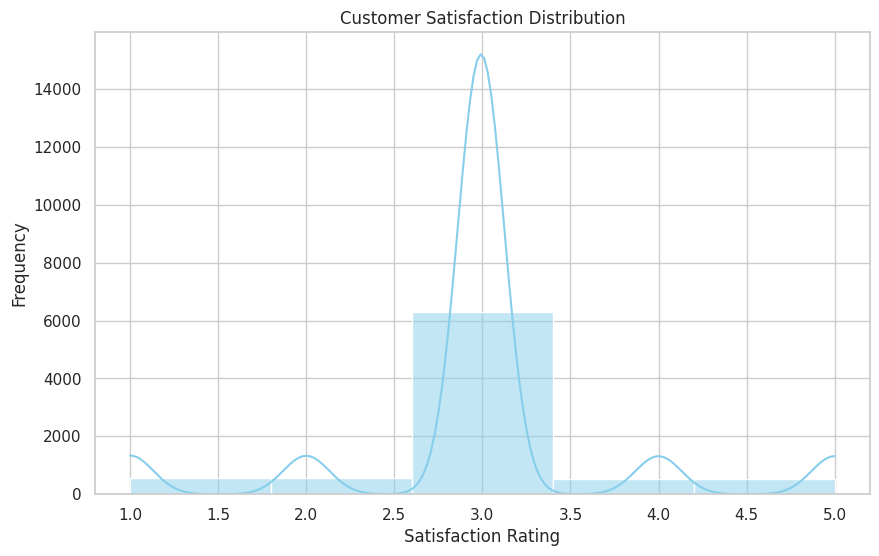

In [ ]:
#Customer Satisfaction Distribution
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True,color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64


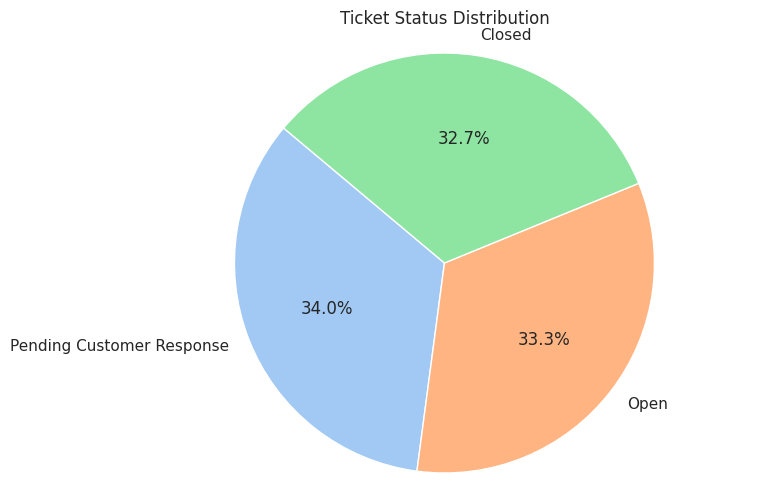

In [ ]:
#Ticekt status Distribution
ticekt_status_distribution=data['Ticket Status'].value_counts()
print(ticekt_status_distribution)

#Plot
plt.figure(figsize=(8, 6))
plt.pie(ticekt_status_distribution, labels=ticekt_status_distribution.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

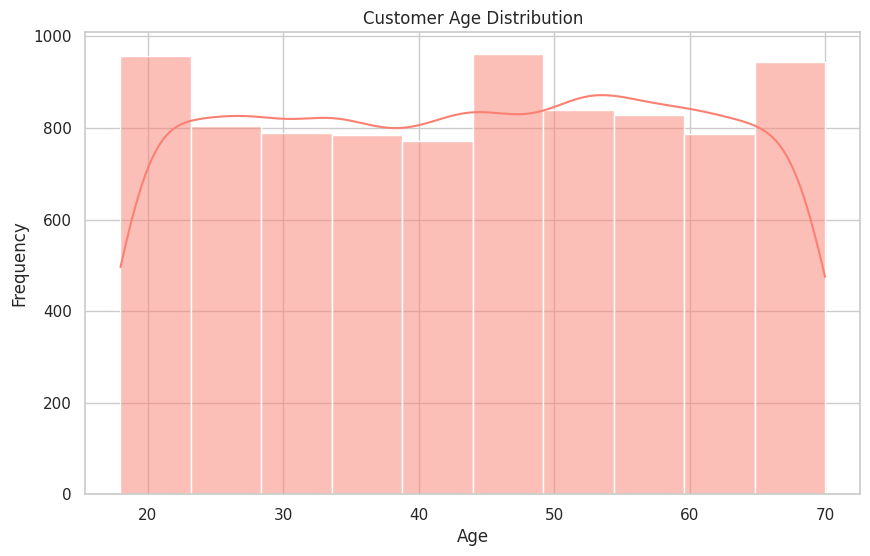

In [ ]:
#customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=10, kde=True,color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64


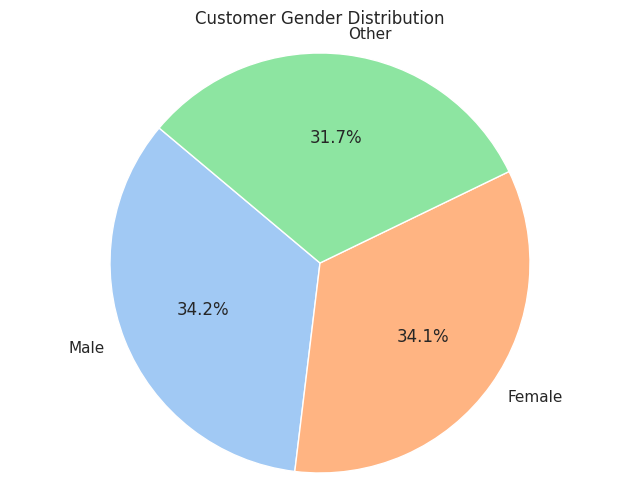

In [ ]:
#Customer Gender Distribution:
gender_distribution=data['Customer Gender'].value_counts()
print(gender_distribution)

#Plot:
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


<ipython-input-21-7cc0de7d4b5c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution.values, palette='rocket')


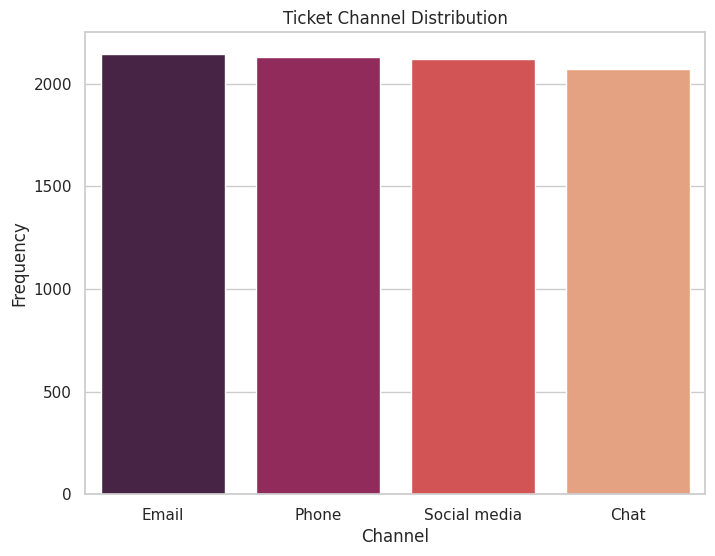

In [ ]:
#Ticket channel Distribution:
ticket_channel_distribution=data['Ticket Channel'].value_counts()
print(ticket_channel_distribution)

#Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution.values, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()

  Customer Gender  Customer Satisfaction Rating
0          Female                      2.984588
1            Male                      3.003052
2           Other                      2.985946


<ipython-input-22-300560d59115>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted', order=['Male','Female','Other'])


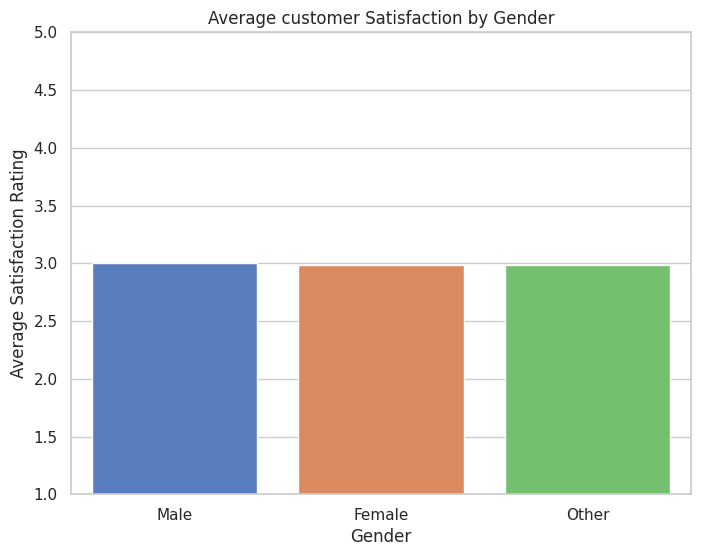

In [ ]:
#Average customer Satisfaction by Gender
average_satisfaction=data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
print(average_satisfaction)

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted', order=['Male','Female','Other'])
plt.title('Average customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1,5)
plt.show()


Product Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Philips Hue Lights     221
Amazon Echo            221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64


<ipython-input-23-dda96b70b5d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_distribution.index, x=product_distribution.values, palette='rocket')


Text(0, 0.5, 'Frequency')

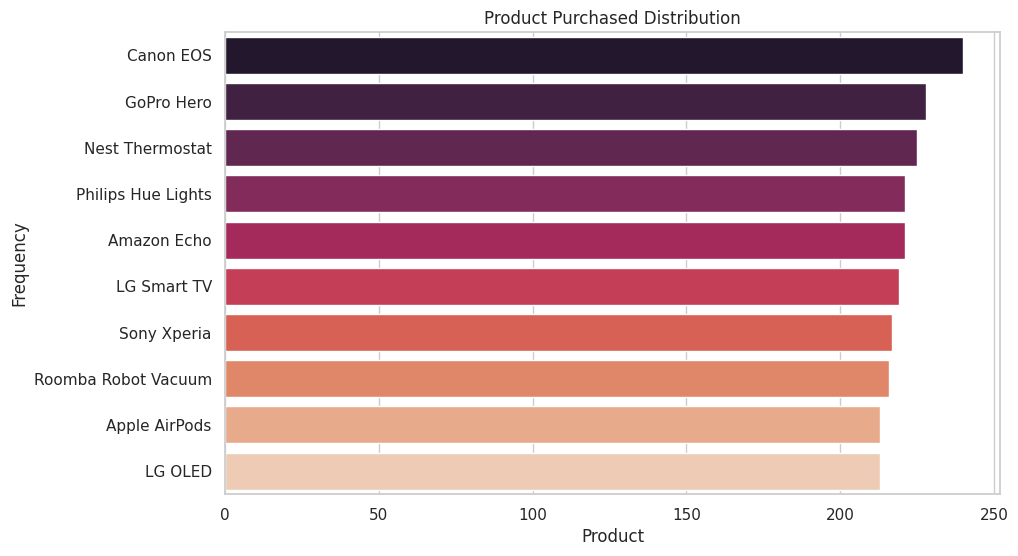

In [ ]:
#Product Purchased Distribution
product_distribution=data['Product Purchased'].value_counts().head(10)
print(product_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(y=product_distribution.index, x=product_distribution.values, palette='rocket')
plt.title('Product Purchased Distribution')
plt.xlabel('Product')
plt.ylabel('Frequency')

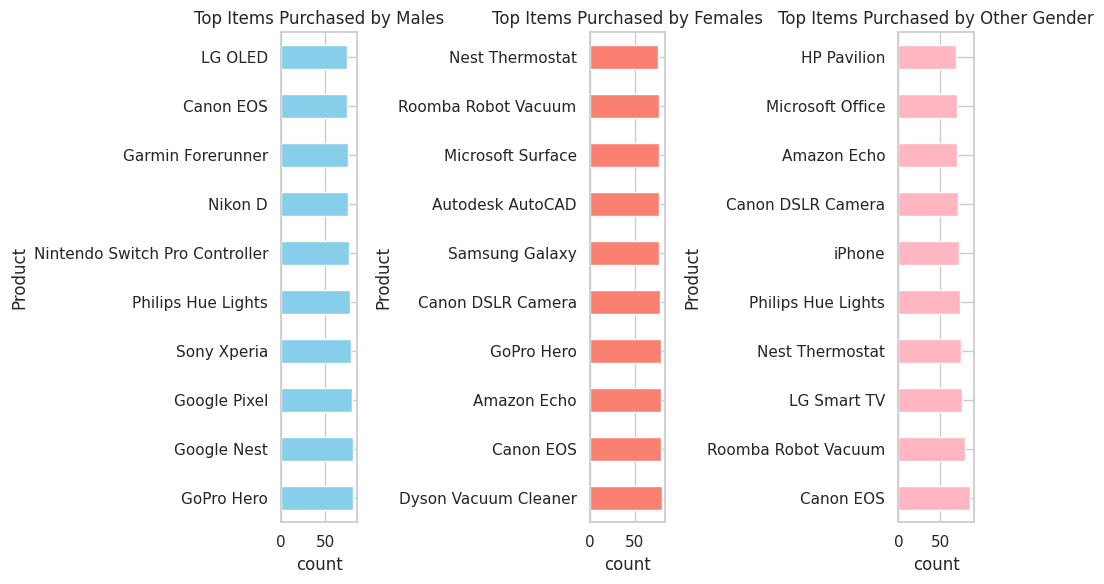

In [ ]:
#Top items Purchased by Gender
plt.figure(figsize=(10, 6))



#top items Purchased ny males
plt.subplot(1,3,1)
top_items_male=data[data['Customer Gender']=='Male']['Product Purchased'].value_counts().head(10)
top_items_male.plot(kind='barh',color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('count')
plt.ylabel('Product')


#top items purchased by females
plt.subplot(1,3,2)
top_items_female=data[data['Customer Gender']=='Female']['Product Purchased'].value_counts().head(10)
top_items_female.plot(kind='barh',color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('count')
plt.ylabel('Product')


#top items purchased by other gender
plt.subplot(1,3,3)
top_items_other=data[data['Customer Gender']=='Other']['Product Purchased'].value_counts().head(10)
top_items_other.plot(kind='barh',color='lightpink')
plt.title('Top Items Purchased by Other Gender')
plt.xlabel('count')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64


Text(0.5, 1.0, 'Ticket Priority Distribution')

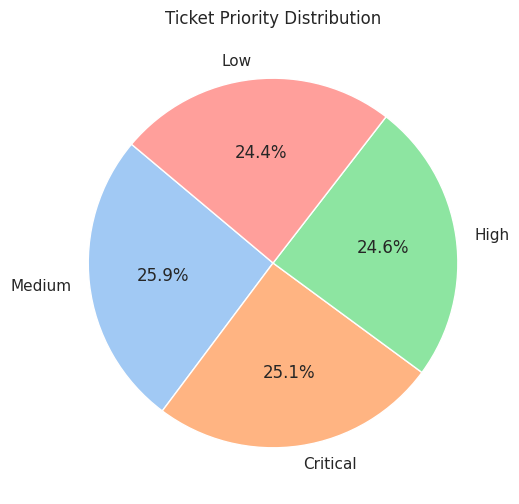

In [ ]:
#Distribution of Ticket Priorty:
ticket_priority_distribution=data['Ticket Priority'].value_counts()
print(ticket_priority_distribution)

plt.figure(figsize=(8, 6))
plt.pie(ticket_priority_distribution, labels=ticket_priority_distribution.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Ticket Priority Distribution')

In [ ]:
#Define age groups
bins=[0,20,30,40,50,60,70,80,90,100]
labels=['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

#categorize customers into age groups
data['Age_Group']=pd.cut(data['Customer Age'],bins=bins,labels=labels,right=False)

Age_Group
0-20       332
21-30     1596
31-40     1556
41-50     1585
51-60     1669
61-70     1575
71-80      156
81-90        0
91-100       0
Name: count, dtype: int64


<ipython-input-27-983ccb19410d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tickets_by_age_group.index, y=tickets_by_age_group.values, palette='rocket')


Text(0.5, 1.0, 'Number of Tickets Raised by Age Group')

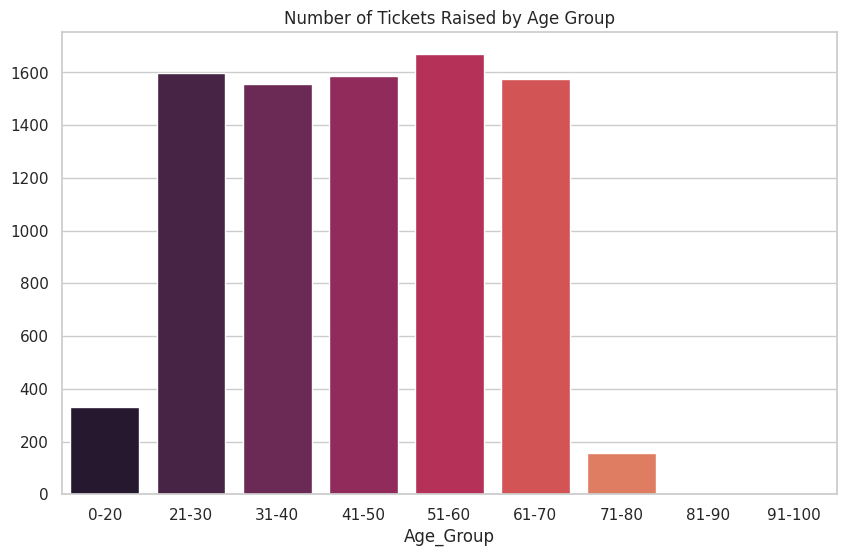

In [ ]:
# number of tickets raised by each group
tickets_by_age_group=data['Age_Group'].value_counts().sort_index()
print(tickets_by_age_group)


#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tickets_by_age_group.index, y=tickets_by_age_group.values, palette='rocket')

plt.title('Number of Tickets Raised by Age Group')

In [ ]:
data.drop(columns=['Ticket ID','Customer Name','Customer Email','Ticket Description'],inplace=True)  # do not provide meaningful information for prediction of customer satisfaction rating

In [ ]:
# Encoding categorical columns:
Label=LabelEncoder()
data['Customer Gender']=Label.fit_transform(data['Customer Gender'])
data['Product Purchased']=Label.fit_transform(data['Product Purchased'])
data['Ticket Type']=Label.fit_transform(data['Ticket Type'])
data['Ticket Status']=Label.fit_transform(data['Ticket Status'])
data['Ticket Subject']=Label.fit_transform(data['Ticket Subject'])
data['Ticket Channel']=Label.fit_transform(data['Ticket Channel'])
data['Ticket Priority']=Label.fit_transform(data['Ticket Priority'])



In [ ]:
data.drop(columns=['YearMonth','Age_Group','Resolution'],inplace=True)   # do not provide meaningful information for prediction of customer satisfaction rating

In [ ]:
# Convert to datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'])
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'])

# Extract useful features
data['Purchase_Year'] = data['Date of Purchase'].dt.year
data['Purchase_Month'] = data['Date of Purchase'].dt.month
data['Purchase_Day'] = data['Date of Purchase'].dt.day
data['Purchase_DayOfWeek'] = data['Date of Purchase'].dt.dayofweek

data['Response_Hour'] = data['First Response Time'].dt.hour
data['Response_DayOfWeek'] = data['First Response Time'].dt.dayofweek

# Calculate time differences
data['Response_Time_Diff'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600  # Convert to hours
data['Resolution_Time_Diff'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600  # Convert to hours

data.drop(columns=['Date of Purchase', 'First Response Time', 'Time to Resolution'], inplace=True)


In [ ]:
#Scaling Numerical columns

scaler = StandardScaler()
num_cols = ['Customer Age', 'Response_Time_Diff', 'Resolution_Time_Diff']
data[num_cols] = scaler.fit_transform(data[num_cols])


In [ ]:
# Define a function to categorize the ratings
def categorize_satisfaction(rating):
    if rating < 2:
        return 'Very Dissatisfied'
    elif 2 <= rating < 3:
        return 'Dissatisfied'
    elif 3 <= rating < 4:
        return 'Neutral'
    elif 4 <= rating < 5:
        return 'Satisfied'
    else:
        return 'Very Satisfied'

# Apply the function to the 'Customer Satisfaction Rating' column
data['Satisfaction Category'] = data['Customer Satisfaction Rating'].apply(categorize_satisfaction)



In [ ]:
data.drop(columns=['Customer Satisfaction Rating'],inplace=True)  # drop the column after categorizing

In [ ]:
data['Satisfaction Category']=Label.fit_transform(data['Satisfaction Category'])

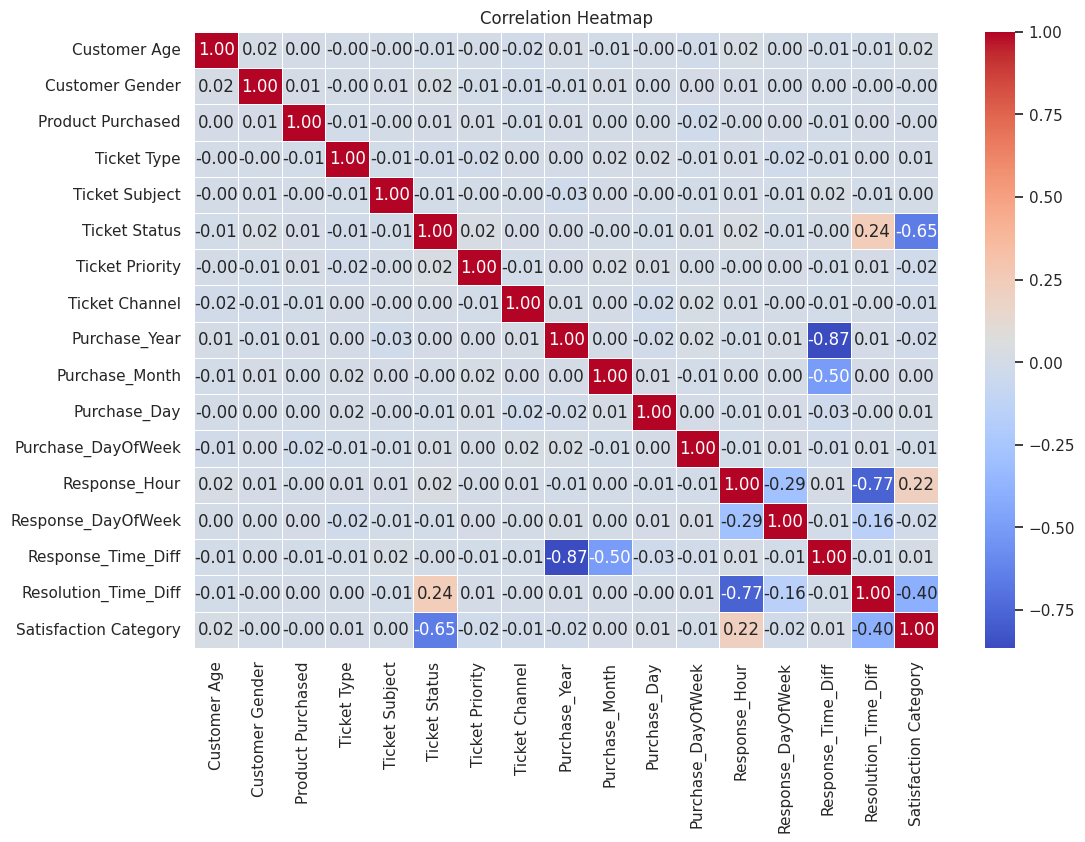

In [ ]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Split Data into Train & Test Sets

X = data.drop(columns=['Satisfaction Category'])  # Features
y = data['Satisfaction Category']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6351, 16) (6351,)
Testing set shape: (2118, 16) (2118,)


**Model Building**

In [ ]:

random_forest_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42,bootstrap=True,max_samples=1.0,max_features='sqrt')
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=1.0,
                       random_state=42)

In [ ]:
#Prediction on the test data
y_pred = random_forest_model.predict(X_test)

**Model Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7341831916902738
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1550
           1       0.17      0.20      0.18       144
           2       0.22      0.19      0.21       151
           3       0.25      0.21      0.23       136
           4       0.18      0.15      0.17       137

    accuracy                           0.73      2118
   macro avg       0.35      0.34      0.34      2118
weighted avg       0.72      0.73      0.73      2118



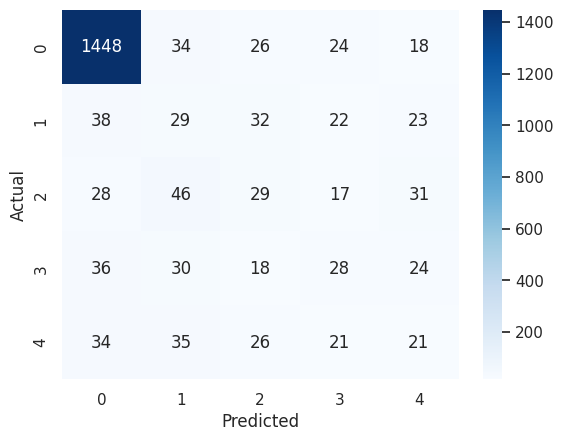

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


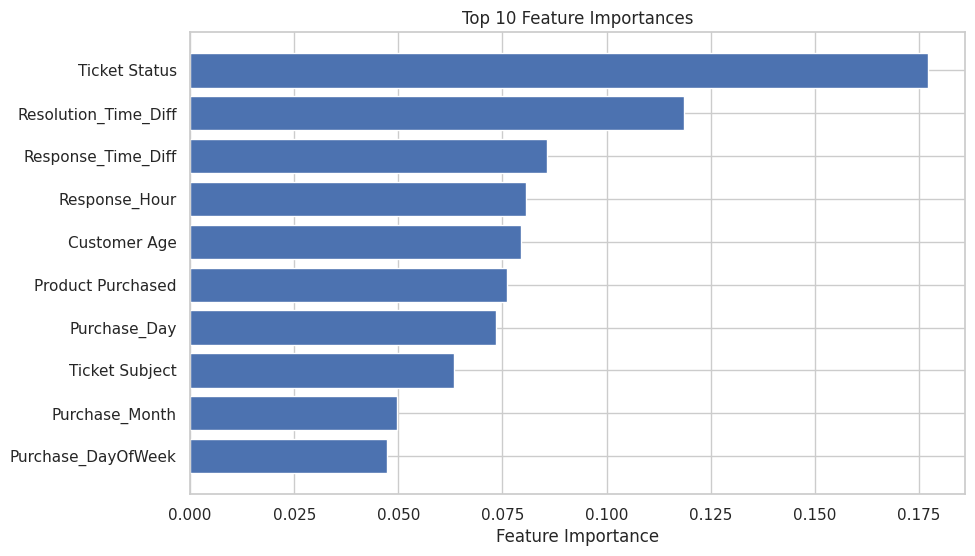

In [ ]:
#Get feature importance and corresponding feature names
feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

**Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [50, 100],  # Reduce from [50, 100, 200, 300]
    'max_depth': [10, 20],  # Reduce from [10, 20, 30, None]
    'min_samples_split': [2, 5]  # Reduce from [2, 5, 10]
}

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_params = grid_search.best_params_

# Train the model with best hyperparameters
best_rf = RandomForestClassifier(**best_params, class_weight='balanced',random_state=42)
best_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=50,
                       random_state=42)

Accuracy: 0.7417374881964117
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1550
           1       0.23      0.28      0.25       144
           2       0.23      0.21      0.22       151
           3       0.24      0.24      0.24       136
           4       0.20      0.18      0.19       137

    accuracy                           0.74      2118
   macro avg       0.37      0.37      0.37      2118
weighted avg       0.74      0.74      0.74      2118



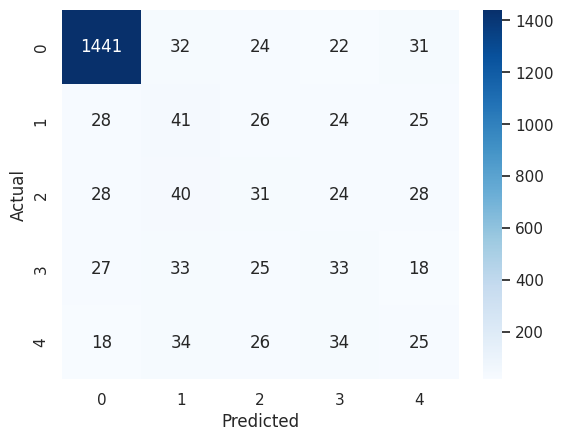

In [ ]:
# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
